In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] =10,6


In [2]:
dataset = pd.read_excel('ImportExportData.xlsx',sheet_name='Sheet2')
ied = dataset
print(dataset)
locationAmnth =dataset.iloc[:, :]

print(locationAmnth)

locationAmnth['Month'] = pd.to_datetime(locationAmnth['Month'], infer_datetime_format=True)
indexedDataset = locationAmnth.set_index(['Month'])

        Month  Export
0  2018-01-01     305
1  2018-02-01     298
2  2018-03-01     312
3  2018-04-01     403
4  2018-05-01     254
5  2018-06-01     330
6  2018-07-01     432
7  2018-08-01     560
8  2018-09-01     200
9  2018-10-01     380
10 2018-11-01     447
11 2018-12-01     628
12 2019-01-01     706
13 2019-02-01     616
14 2019-03-01     746
15 2019-04-01     514
16 2019-05-01     579
17 2019-06-01     587
18 2019-07-01     474
19 2019-08-01     514
20 2019-09-01     439
21 2019-10-01     480
22 2019-11-01     455
23 2019-12-01     530
        Month  Export
0  2018-01-01     305
1  2018-02-01     298
2  2018-03-01     312
3  2018-04-01     403
4  2018-05-01     254
5  2018-06-01     330
6  2018-07-01     432
7  2018-08-01     560
8  2018-09-01     200
9  2018-10-01     380
10 2018-11-01     447
11 2018-12-01     628
12 2019-01-01     706
13 2019-02-01     616
14 2019-03-01     746
15 2019-04-01     514
16 2019-05-01     579
17 2019-06-01     587
18 2019-07-01     474
19 2019-08

In [3]:
from datetime import datetime
indexedDataset.tail(5)

,Export
Month,
2019-08-01,514
2019-09-01,439
2019-10-01,480
2019-11-01,455
2019-12-01,530


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


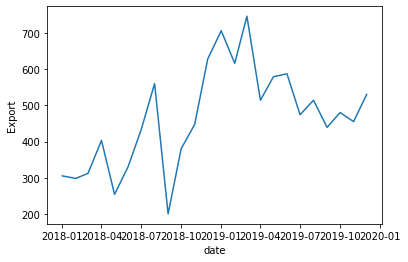

In [4]:
plt.xlabel('date')
plt.ylabel('Export')
plt.plot(indexedDataset)

In [5]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                Export
Month                 
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01  379.083333
2019-01-01  412.500000
2019-02-01  439.000000
2019-03-01  475.166667
2019-04-01  484.416667
2019-05-01  511.500000
2019-06-01  532.916667
2019-07-01  536.416667
2019-08-01  532.583333
2019-09-01  552.500000
2019-10-01  560.833333
2019-11-01  561.500000
2019-12-01  553.333333                 Export
Month                 
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01  124.083885
2019-01-01  152.956025
2019-02-01  158.752523
2019-03-01  175.719215
2019-04-01 

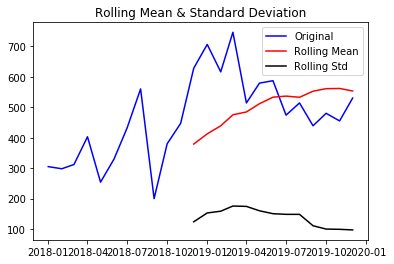

In [6]:
#plot rollling statistics
orig = plt.plot(indexedDataset, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [7]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Export'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)



Results of Dickey Fuller Test:
Test Statistics                -3.836434
p-value                         0.002556
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


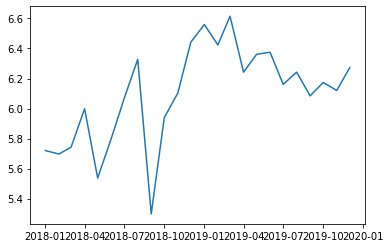

In [8]:
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


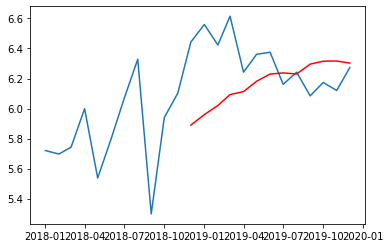

In [9]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

#time series still not stationary

In [10]:
datasetlogScaleandMovingAverage = indexedDataset_logScale - movingAverage
datasetlogScaleandMovingAverage.head(12)

datasetlogScaleandMovingAverage.dropna(inplace=True)
datasetlogScaleandMovingAverage.head(10)

,Export
Month,
2018-12-01,0.552897
2019-01-01,0.600030
2019-02-01,0.403149
2019-03-01,0.521984
2019-04-01,0.129208
2019-05-01,0.179623
2019-06-01,0.145351
2019-07-01,-0.076198
2019-08-01,0.011960


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Export'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
    

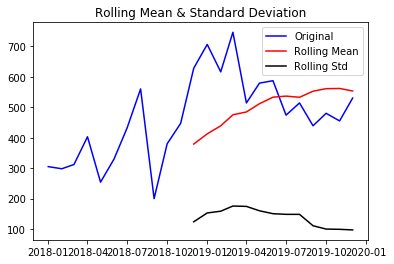

Results of Dickey Fuller Test:
Test Statistics                -3.836434
p-value                         0.002556
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [12]:
test_stationarity(datasetlogScaleandMovingAverage)

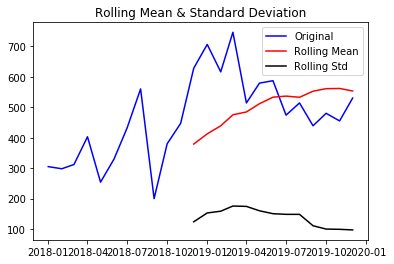

Results of Dickey Fuller Test:
Test Statistics                -3.836434
p-value                         0.002556
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Export'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
test_stationarity(datasetlogScaleandMovingAverage)    

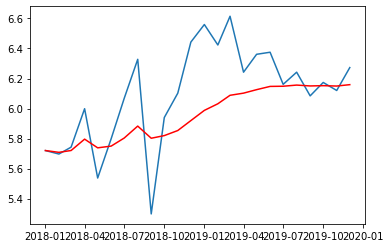

In [14]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

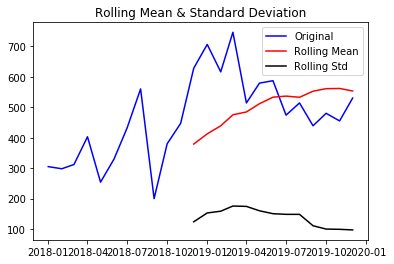

Results of Dickey Fuller Test:
Test Statistics                -3.836434
p-value                         0.002556
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [15]:
datasetlogScaleandMovingexponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleandMovingexponentialDecayAverage)

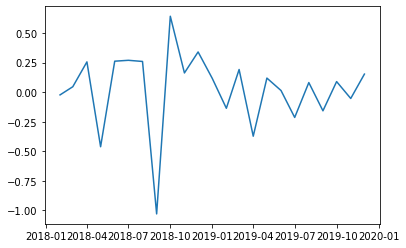

In [16]:
datasetlogOffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogOffShifting)

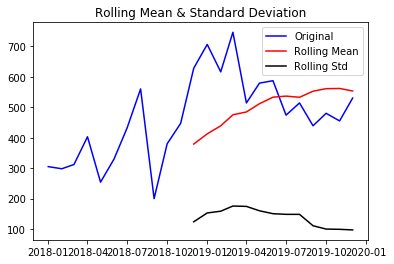

Results of Dickey Fuller Test:
Test Statistics                -3.836434
p-value                         0.002556
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [17]:
datasetlogOffShifting.dropna(inplace=True)
test_stationarity(datasetlogOffShifting)

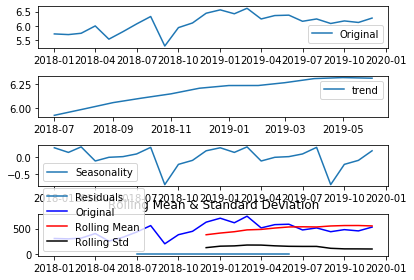

Results of Dickey Fuller Test:
Test Statistics                -3.836434
p-value                         0.002556
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [18]:
#components of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

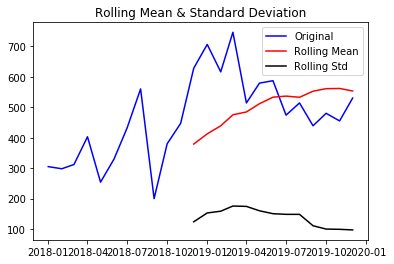

Results of Dickey Fuller Test:
Test Statistics                -3.836434
p-value                         0.002556
#Lags Used                      8.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [19]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


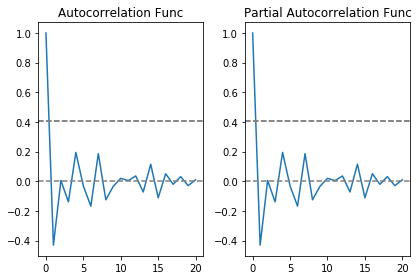

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogOffShifting, nlags=20)
lag_pacf = pacf(datasetlogOffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Func')

#Plot PACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Func')
plt.tight_layout()
                          
                          

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


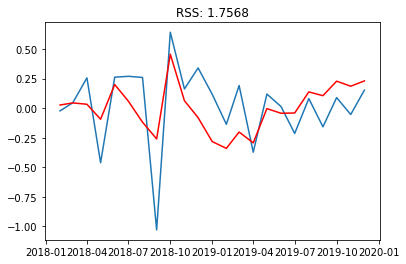

In [25]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model=ARIMA(indexedDataset_logScale, order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogOffShifting['Export'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


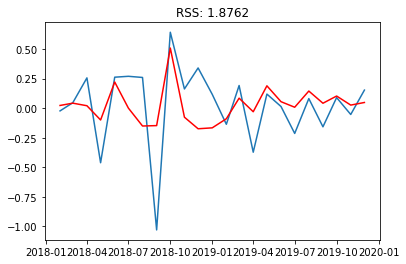

In [22]:
#MA MODEL
model=ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogOffShifting['Export'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.6965')

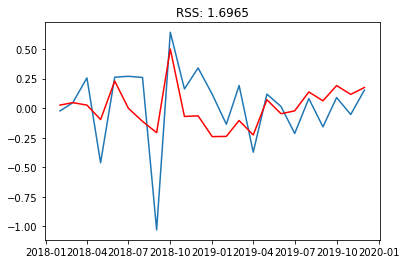

In [32]:
model=ARIMA(indexedDataset_logScale, order=(2,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogOffShifting['Export'])**2))


In [33]:
pridictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pridictions_ARIMA_diff.head())

Month
2018-02-01    0.025907
2018-03-01    0.046725
2018-04-01    0.025625
2018-05-01   -0.096505
2018-06-01    0.229024
dtype: float64


In [34]:
#Convert to Cummulative Sum
pridictions_ARIMA_diff_cumsum = pridictions_ARIMA_diff.cumsum()
print(pridictions_ARIMA_diff_cumsum.head())

Month
2018-02-01    0.025907
2018-03-01    0.072632
2018-04-01    0.098257
2018-05-01    0.001752
2018-06-01    0.230776
dtype: float64


In [35]:
pridictions_ARIMA_log = pd.Series(indexedDataset_logScale['Export'].ix[0], index= indexedDataset_logScale.index)
pridictions_ARIMA_log = pridictions_ARIMA_log.add(pridictions_ARIMA_diff_cumsum, fill_value=0)
pridictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-01-01    5.720312
2018-02-01    5.746219
2018-03-01    5.792944
2018-04-01    5.818569
2018-05-01    5.722063
dtype: float64

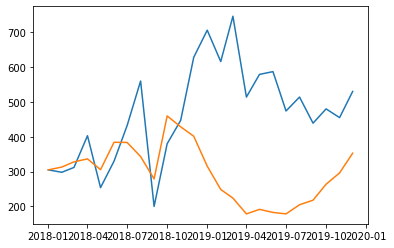

In [36]:
pridictions_ARIMA = np.exp(pridictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(pridictions_ARIMA)

In [37]:
indexedDataset_logScale

,Export
Month,
2018-01-01,5.720312
2018-02-01,5.697093
2018-03-01,5.743003
2018-04-01,5.998937
2018-05-01,5.537334
2018-06-01,5.799093
2018-07-01,6.068426
2018-08-01,6.327937
2018-09-01,5.298317


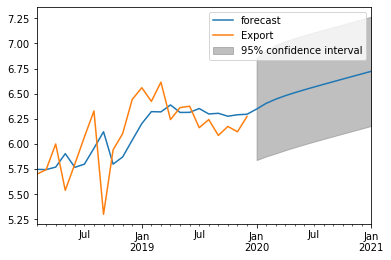

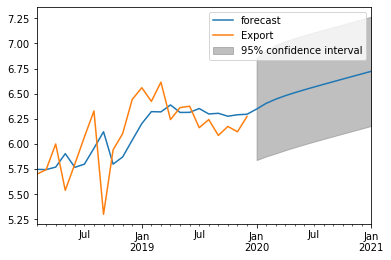

In [38]:
results_ARIMA.plot_predict(1,36)



In [39]:
results_ARIMA.forecast(steps=12)

(array([6.34662741, 6.40369311, 6.4451536 , 6.47981953, 6.51038646,
        6.53883882, 6.56611912, 6.5927713 , 6.61908154, 6.64520701,
        6.67123227, 6.69720329]),
 array([0.25915552, 0.26977473, 0.27575424, 0.2770502 , 0.27748629,
        0.27760618, 0.27764241, 0.2776529 , 0.27765599, 0.2776569 ,
        0.27765717, 0.27765724]),
 array([[5.83869192, 6.8545629 ],
        [5.87494436, 6.93244186],
        [5.90468523, 6.98562198],
        [5.93681112, 7.02282793],
        [5.96652332, 7.0542496 ],
        [5.99474072, 7.08293693],
        [6.02194999, 7.11028826],
        [6.04858162, 7.13696098],
        [6.07488579, 7.16327729],
        [6.10100948, 7.18940453],
        [6.12703423, 7.21543032],
        [6.15300509, 7.24140149]]))

In [40]:
x=results_ARIMA.forecast(steps=12)
print(x[0])


[6.34662741 6.40369311 6.4451536  6.47981953 6.51038646 6.53883882
 6.56611912 6.5927713  6.61908154 6.64520701 6.67123227 6.69720329]


In [41]:
print(np.exp(x[0]))

[570.56517957 604.07182725 629.64338469 651.85329276 672.08610106
 691.48317721 710.60670755 729.80056521 749.25662087 769.08923706
 789.36772065 810.13693705]
